# Titanic EDA


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [18]:
df = pd.read_csv(r"C:\Users\dell\Downloads\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.info()

# Summary statistics
print(df.describe())
print('\nCategorical columns:\n', df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    

In [22]:
# Missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


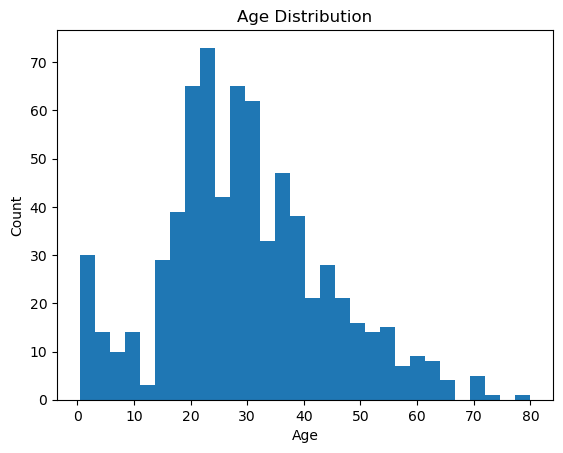

In [24]:
# Age distribution
plt.hist(df['Age'].dropna(), bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

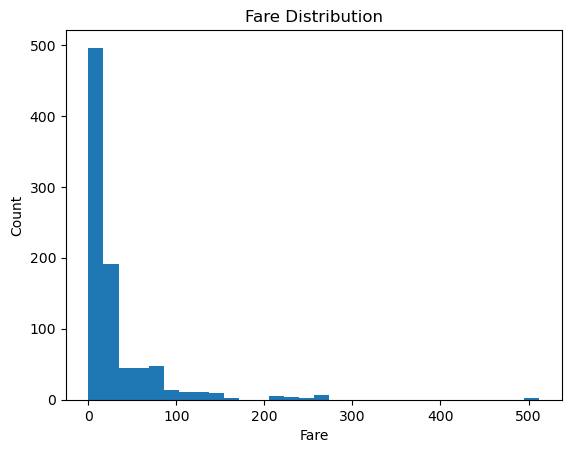

In [26]:
# Fare distribution
plt.hist(df['Fare'].dropna(), bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_17292\661248042.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[f'Pclass {c}' for c in sorted(df['Pclass'].unique())])


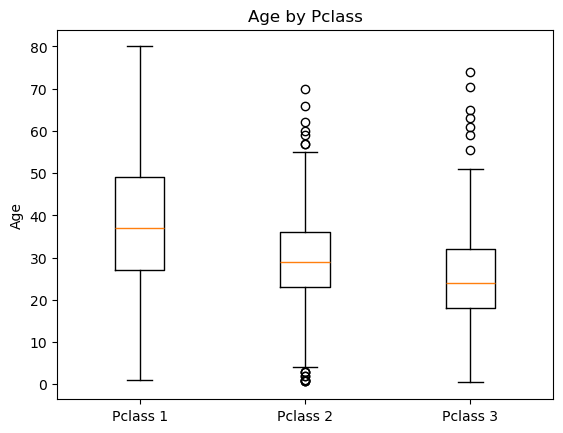

In [28]:
# Age by Pclass
import matplotlib.pyplot as plt
data_to_plot = [df.loc[df['Pclass']==c, 'Age'].dropna() for c in sorted(df['Pclass'].unique())]
plt.boxplot(data_to_plot, labels=[f'Pclass {c}' for c in sorted(df['Pclass'].unique())])
plt.title('Age by Pclass')
plt.ylabel('Age')
plt.show()

Survived
0    549
1    342
Name: count, dtype: int64


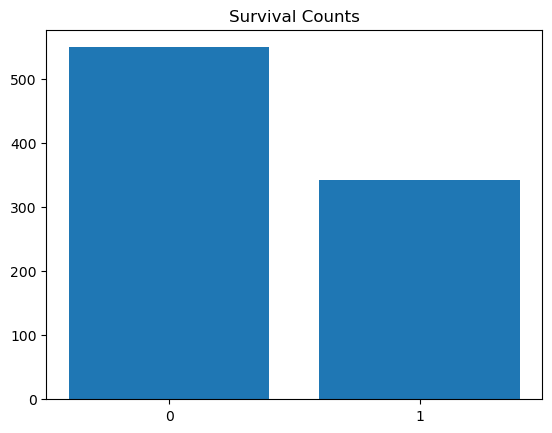

In [30]:
# Survival counts
print(df['Survived'].value_counts())
plt.bar(df['Survived'].value_counts().index.astype(str), df['Survived'].value_counts().values)
plt.title('Survival Counts')
plt.show()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


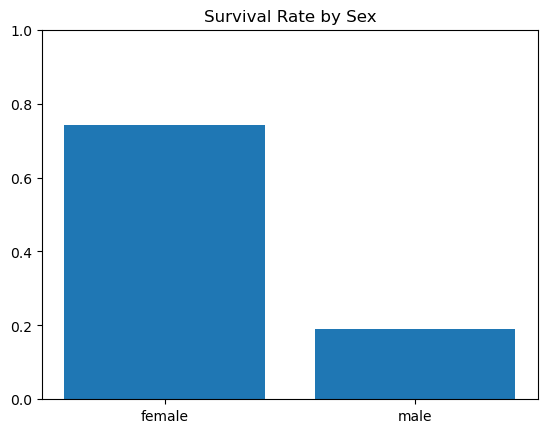

In [32]:
# Survival rate by sex
print(df.groupby('Sex')['Survived'].mean())
plt.bar(df.groupby('Sex')['Survived'].mean().index, df.groupby('Sex')['Survived'].mean().values)
plt.ylim(0,1)
plt.title('Survival Rate by Sex')
plt.show()

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


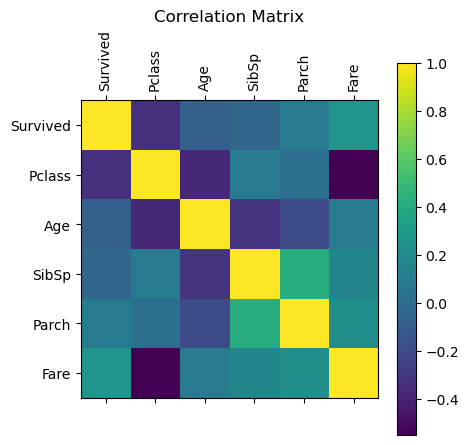

In [34]:
# Correlation matrix
num_df = df.select_dtypes(include=[np.number]).drop(columns=['PassengerId'], errors='ignore')
print(num_df.corr())
plt.matshow(num_df.corr())
plt.xticks(range(len(num_df.columns)), num_df.columns, rotation=90)
plt.yticks(range(len(num_df.columns)), num_df.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

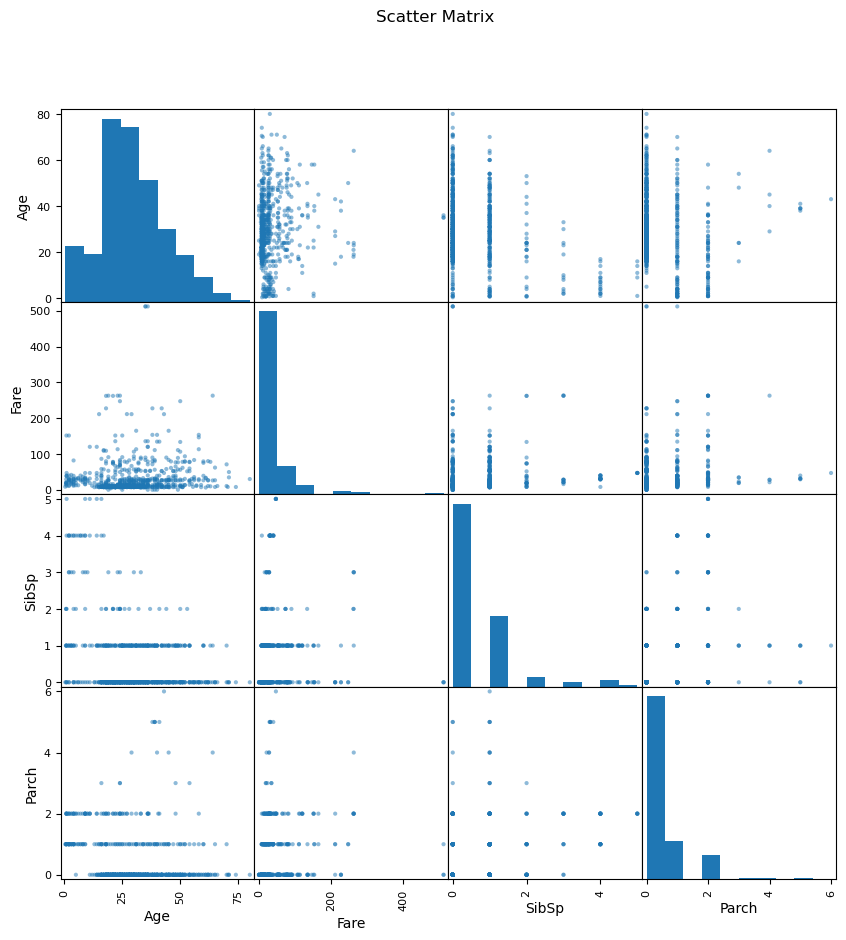

In [36]:
# Scatter matrix
cols = ['Age','Fare','SibSp','Parch']
scatter_matrix(df[cols].dropna(), figsize=(10,10))
plt.suptitle('Scatter Matrix')
plt.show()

## Summary
- Females survived at higher rate than males.
- Pclass and Fare show relationships with survival.
- Missing values should be handled before modeling.